Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Loading Model

In [2]:
model = tf.keras.models.load_model('Trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Visualizing Single image of TestSet

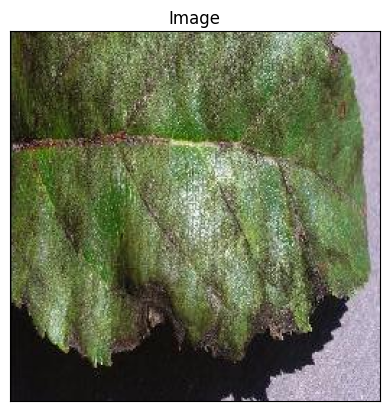

In [16]:
import cv2
image_path = r'test\test\AppleScab3.JPG'
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#convert BGR to RGB
#Display Image
plt.imshow(img)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

Model Testing

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [11]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 6s 6s/step


(array([[1.01357447e-11, 4.38273018e-09, 1.00000000e+00, 3.66859035e-17,
         1.43189870e-11, 5.44384524e-13, 1.41811222e-16, 6.77528238e-14,
         3.96640449e-17, 1.30274419e-15, 3.46983688e-20, 5.48950219e-10,
         8.25117325e-15, 3.30469121e-15, 4.54616162e-13, 4.42047860e-15,
         1.68600203e-11, 1.20678783e-14, 6.93249494e-12, 3.53635442e-14,
         5.19972033e-16, 2.19893856e-16, 2.25246169e-14, 8.35583095e-14,
         4.36166381e-17, 1.24214862e-15, 2.11237169e-13, 1.41798389e-14,
         3.68617680e-12, 1.04071465e-11, 2.10158144e-13, 7.58745591e-16,
         1.30250585e-11, 3.21981194e-15, 7.77427345e-10, 6.48471687e-14,
         1.70774454e-11, 6.52103751e-13]], dtype=float32),
 (1, 38))

In [12]:
result_index = np.argmax(prediction)
result_index

2

In [13]:
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

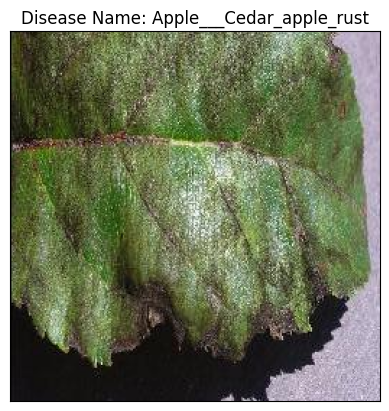

In [17]:
#Display Result of disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()